In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv('mlp_data_preprocessed.csv')

In [5]:
# Split features and target variable
X = data.drop('good_bad', axis=1)
y = data['good_bad']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert y_train, y_test to a NumPy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [10]:
# Define the MLP model architecture
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


7919/7919 [==============================] - 9s 1ms/step - loss: 0.2970 - accuracy: 0.8987 - val_loss: 0.2789 - val_accuracy: 0.8970
Epoch 2/10
7919/7919 [==============================] - 8s 1ms/step - loss: 0.2776 - accuracy: 0.8994 - val_loss: 0.2760 - val_accuracy: 0.8969
Epoch 3/10
7919/7919 [==============================] - 9s 1ms/step - loss: 0.2748 - accuracy: 0.8995 - val_loss: 0.2741 - val_accuracy: 0.8970
Epoch 4/10
7919/7919 [==============================] - 9s 1ms/step - loss: 0.2734 - accuracy: 0.8996 - val_loss: 0.2743 - val_accuracy: 0.8969
Epoch 5/10
7919/7919 [==============================] - 8s 1ms/step - loss: 0.2734 - accuracy: 0.8997 - val_loss: 0.2735 - val_accuracy: 0.8973
Epoch 6/10
7919/7919 [==============================] - 8s 1ms/step - loss: 0.2724 - accuracy: 0.8996 - val_loss: 0.2736 - val_accuracy: 0.8971
Epoch 7/10
7919/7919 [==============================] - 8s 1ms/step - loss: 0.2715 - accuracy: 0.8995 - val_loss: 0.2737 - val_accurac

In [13]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

2475/2475 [==============================] - 2s 646us/step - loss: 0.2703 - accuracy: 0.8994


In [14]:
# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

2475/2475 [==============================] - 2s 580us/step


In [15]:
# Print the accuracy
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8993647694587708


In [16]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.00      0.01      7989
           1       0.90      1.00      0.95     71198

    accuracy                           0.90     79187
   macro avg       0.79      0.50      0.48     79187
weighted avg       0.88      0.90      0.85     79187



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc



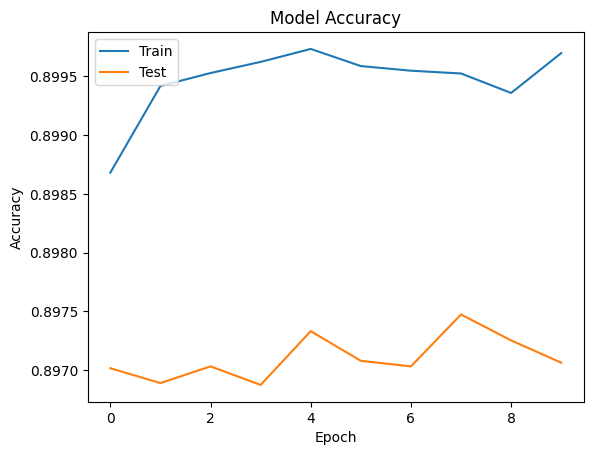

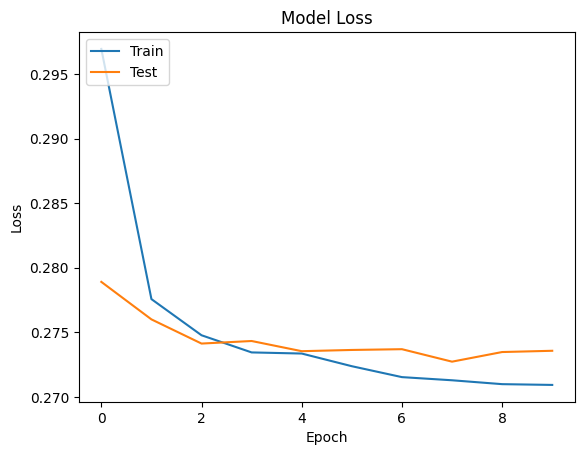

In [18]:

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


2475/2475 [==============================] - 3s 1ms/step


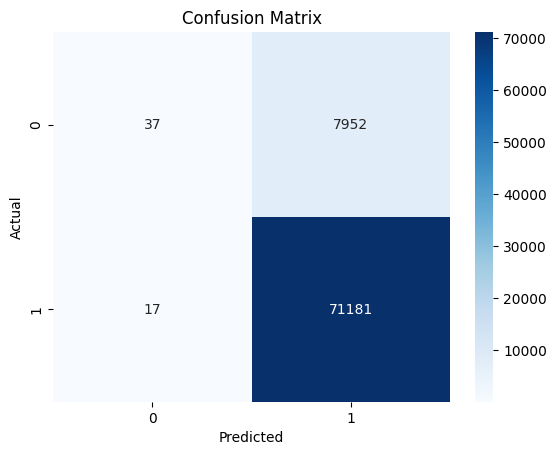

In [23]:

y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


2475/2475 [==============================] - 3s 1ms/step


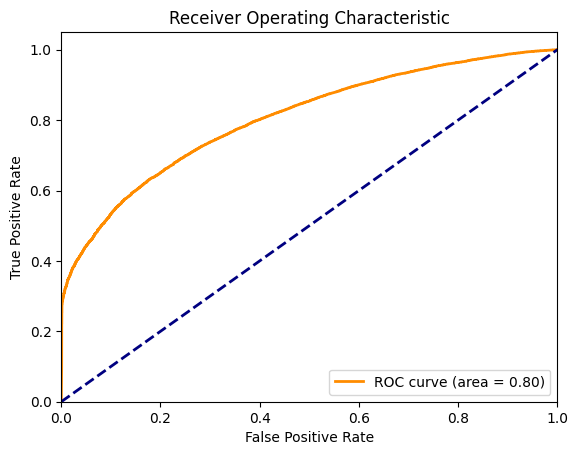

In [25]:
# Compute ROC curve and ROC area
y_pred_prob = model.predict(X_test).flatten()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
